In [1]:
import numpy as np
import pandas as pd
from fancyimpute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [2]:
'''
pre-processes melanoma data

'''

'\npre-processes melanoma data\n\n'

In [3]:
# read in data

raw_data = pd.read_csv('/total_PD_1.csv')
raw_data.head()

<ipython-input-3-fd9b7dcf4b1f>:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('/total_PD_1.csv')


,Unnamed: 0,GSM2445716,GSM2445717,GSM2445718,GSM2445719,GSM2445720,GSM2445721,GSM2445722,GSM2445723,GSM2445724,...,SRR5088909,SRR5088911,SRR5088913,SRR5088914,SRR5088916,SRR5088920,SRR5088922,SRR5088924,SRR5088926,SRR5088929
0,5S_rRNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.039753,0.1036,0.0,0.0,0.042818,0.138019,0.013987,0.054,0.091482,0.072701
1,5_8S_rRNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7SK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A1BG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.029803,0.244701,0.172904,0.10584,0.188846,0.102993,0.044042,0.151334,0.169748,0.030423
4,A1BG-AS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.410368,1.108342,1.552272,1.593961,1.206566,0.951995,0.117314,0.550993,1.180457,0.645802


In [4]:
# some re-formatting

# rename column

raw_data = raw_data.rename(columns={raw_data.columns[0]: 'patient'})
print(raw_data.shape)


# transpose so columns are genes and rows are patients
t_data = raw_data.set_index('patient').T
# t_data = raw_data.set_index('patient').T
print(t_data.shape)

# drop rows(patient) with resopnse = UNK
t_data = t_data[t_data["Response"] != "UNK"]
print(t_data.shape)

# split data
labels = t_data['Response']
clean_data= t_data.drop(columns = ['Response'])

# export true labels (no SMOTE; response y/n)
labels.to_csv('/GSE910_noSMOTE_labels_top100.csv')

(56270, 158)
(157, 56270)
(150, 56270)


In [5]:
print(clean_data.index)

Index(['GSM2445716', 'GSM2445717', 'GSM2445718', 'GSM2445719', 'GSM2445720',
       'GSM2445721', 'GSM2445722', 'GSM2445723', 'GSM2445724', 'GSM2445725',
       ...
       'SRR5088909', 'SRR5088911', 'SRR5088913', 'SRR5088914', 'SRR5088916',
       'SRR5088920', 'SRR5088922', 'SRR5088924', 'SRR5088926', 'SRR5088929'],
      dtype='object', length=150)


In [6]:
# filtering

# select GSE910 samples

gse910_indices = clean_data.index[clean_data.index.str.contains('SRR')]

clean_data = clean_data.loc[gse910_indices]
labels = labels.loc[gse910_indices]

# drop any genes with > 90% missing data

clean_data = clean_data.dropna(thresh = clean_data.shape[0]*0.9, axis=1)
print(clean_data)
print(labels)


patient      5S_rRNA 5_8S_rRNA       7SK      A1BG  A1BG-AS1      A1CF  \
SRR7344546       0.0       0.0  1.242231  0.131302   0.56498  0.036516   
SRR7344554  0.093389       0.0  1.564588  0.050331  0.721904  0.010498   
SRR7344556  0.118987       0.0   0.10454       0.0       0.0  0.008822   
SRR7344564  0.203915       0.0   0.02142  0.253573  3.659736   0.07603   
SRR7344565  0.098599       0.0  0.037828  0.181927  2.509024  0.070055   
...              ...       ...       ...       ...       ...       ...   
SRR5088920  0.138019       0.0       0.0  0.102993  0.951995       0.0   
SRR5088922  0.013987       0.0       0.0  0.044042  0.117314  0.015748   
SRR5088924     0.054       0.0       0.0  0.151334  0.550993       0.0   
SRR5088926  0.091482       0.0       0.0  0.169748  1.180457       0.0   
SRR5088929  0.072701       0.0       0.0  0.030423  0.645802       0.0   

patient            A2M   A2M-AS1     A2ML1 A2ML1-AS1  ...           snoU2-30  \
SRR7344546  166.557144  1.19980

In [7]:
# drop genes with >80% 0 input
zero_percent = (clean_data == 0). mean(axis = 0)
clean_data = clean_data.loc[:,zero_percent<0.8]
print(clean_data.shape)

(84, 35548)


In [8]:
clean_data_numeric = clean_data.apply(pd.to_numeric, errors='coerce')
print(clean_data_numeric)

patient      5S_rRNA      A1BG  A1BG-AS1      A1CF         A2M   A2M-AS1  \
SRR7344546  0.000000  0.131302  0.564980  0.036516  166.557144  1.199808   
SRR7344554  0.093389  0.050331  0.721904  0.010498  221.367276  5.243057   
SRR7344556  0.118987  0.000000  0.000000  0.008822   23.646357  1.623148   
SRR7344564  0.203915  0.253573  3.659736  0.076030  140.576617  0.666165   
SRR7344565  0.098599  0.181927  2.509024  0.070055  101.541458  0.345270   
...              ...       ...       ...       ...         ...       ...   
SRR5088920  0.138019  0.102993  0.951995  0.000000   24.167654  0.470565   
SRR5088922  0.013987  0.044042  0.117314  0.015748   52.655333  2.495148   
SRR5088924  0.054000  0.151334  0.550993  0.000000  219.473479  1.361577   
SRR5088926  0.091482  0.169748  1.180457  0.000000  187.784364  0.686251   
SRR5088929  0.072701  0.030423  0.645802  0.000000  566.829472  0.778388   

patient        A2ML1     A2MP1   A3GALT2    A4GALT  ...   snoU2-30  snoU2_19  \
SRR7344

In [9]:
col_var = clean_data_numeric.var()
print(col_var.idxmax())
print(col_var.max())

RN7SL2
172718741.0497013


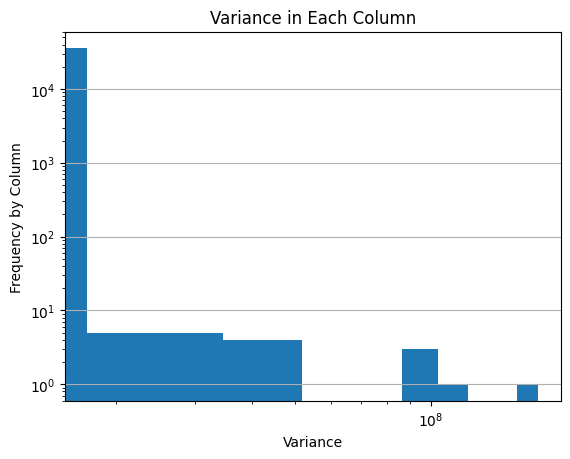

In [10]:
plt.hist(col_var)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Variance')
plt.ylabel('Frequency by Column')
plt.title('Variance in Each Column')
plt.grid(axis='y')
plt.show()

In [11]:
top_100_var = col_var.nlargest(100)
print(top_100_var)
top_100_var.to_csv("/_GSE910_top_100_var.csv")

patient
RN7SL2      1.727187e+08
FTL         1.056368e+08
MT-CO3      9.842050e+07
MT-CO2      9.217200e+07
MT-ATP8     9.044177e+07
                ...     
HP          1.688574e+05
HLA-A       1.607786e+05
IGHV3-7     1.580581e+05
HLA-DRB1    1.503507e+05
KRTDAP      1.497227e+05
Length: 100, dtype: float64


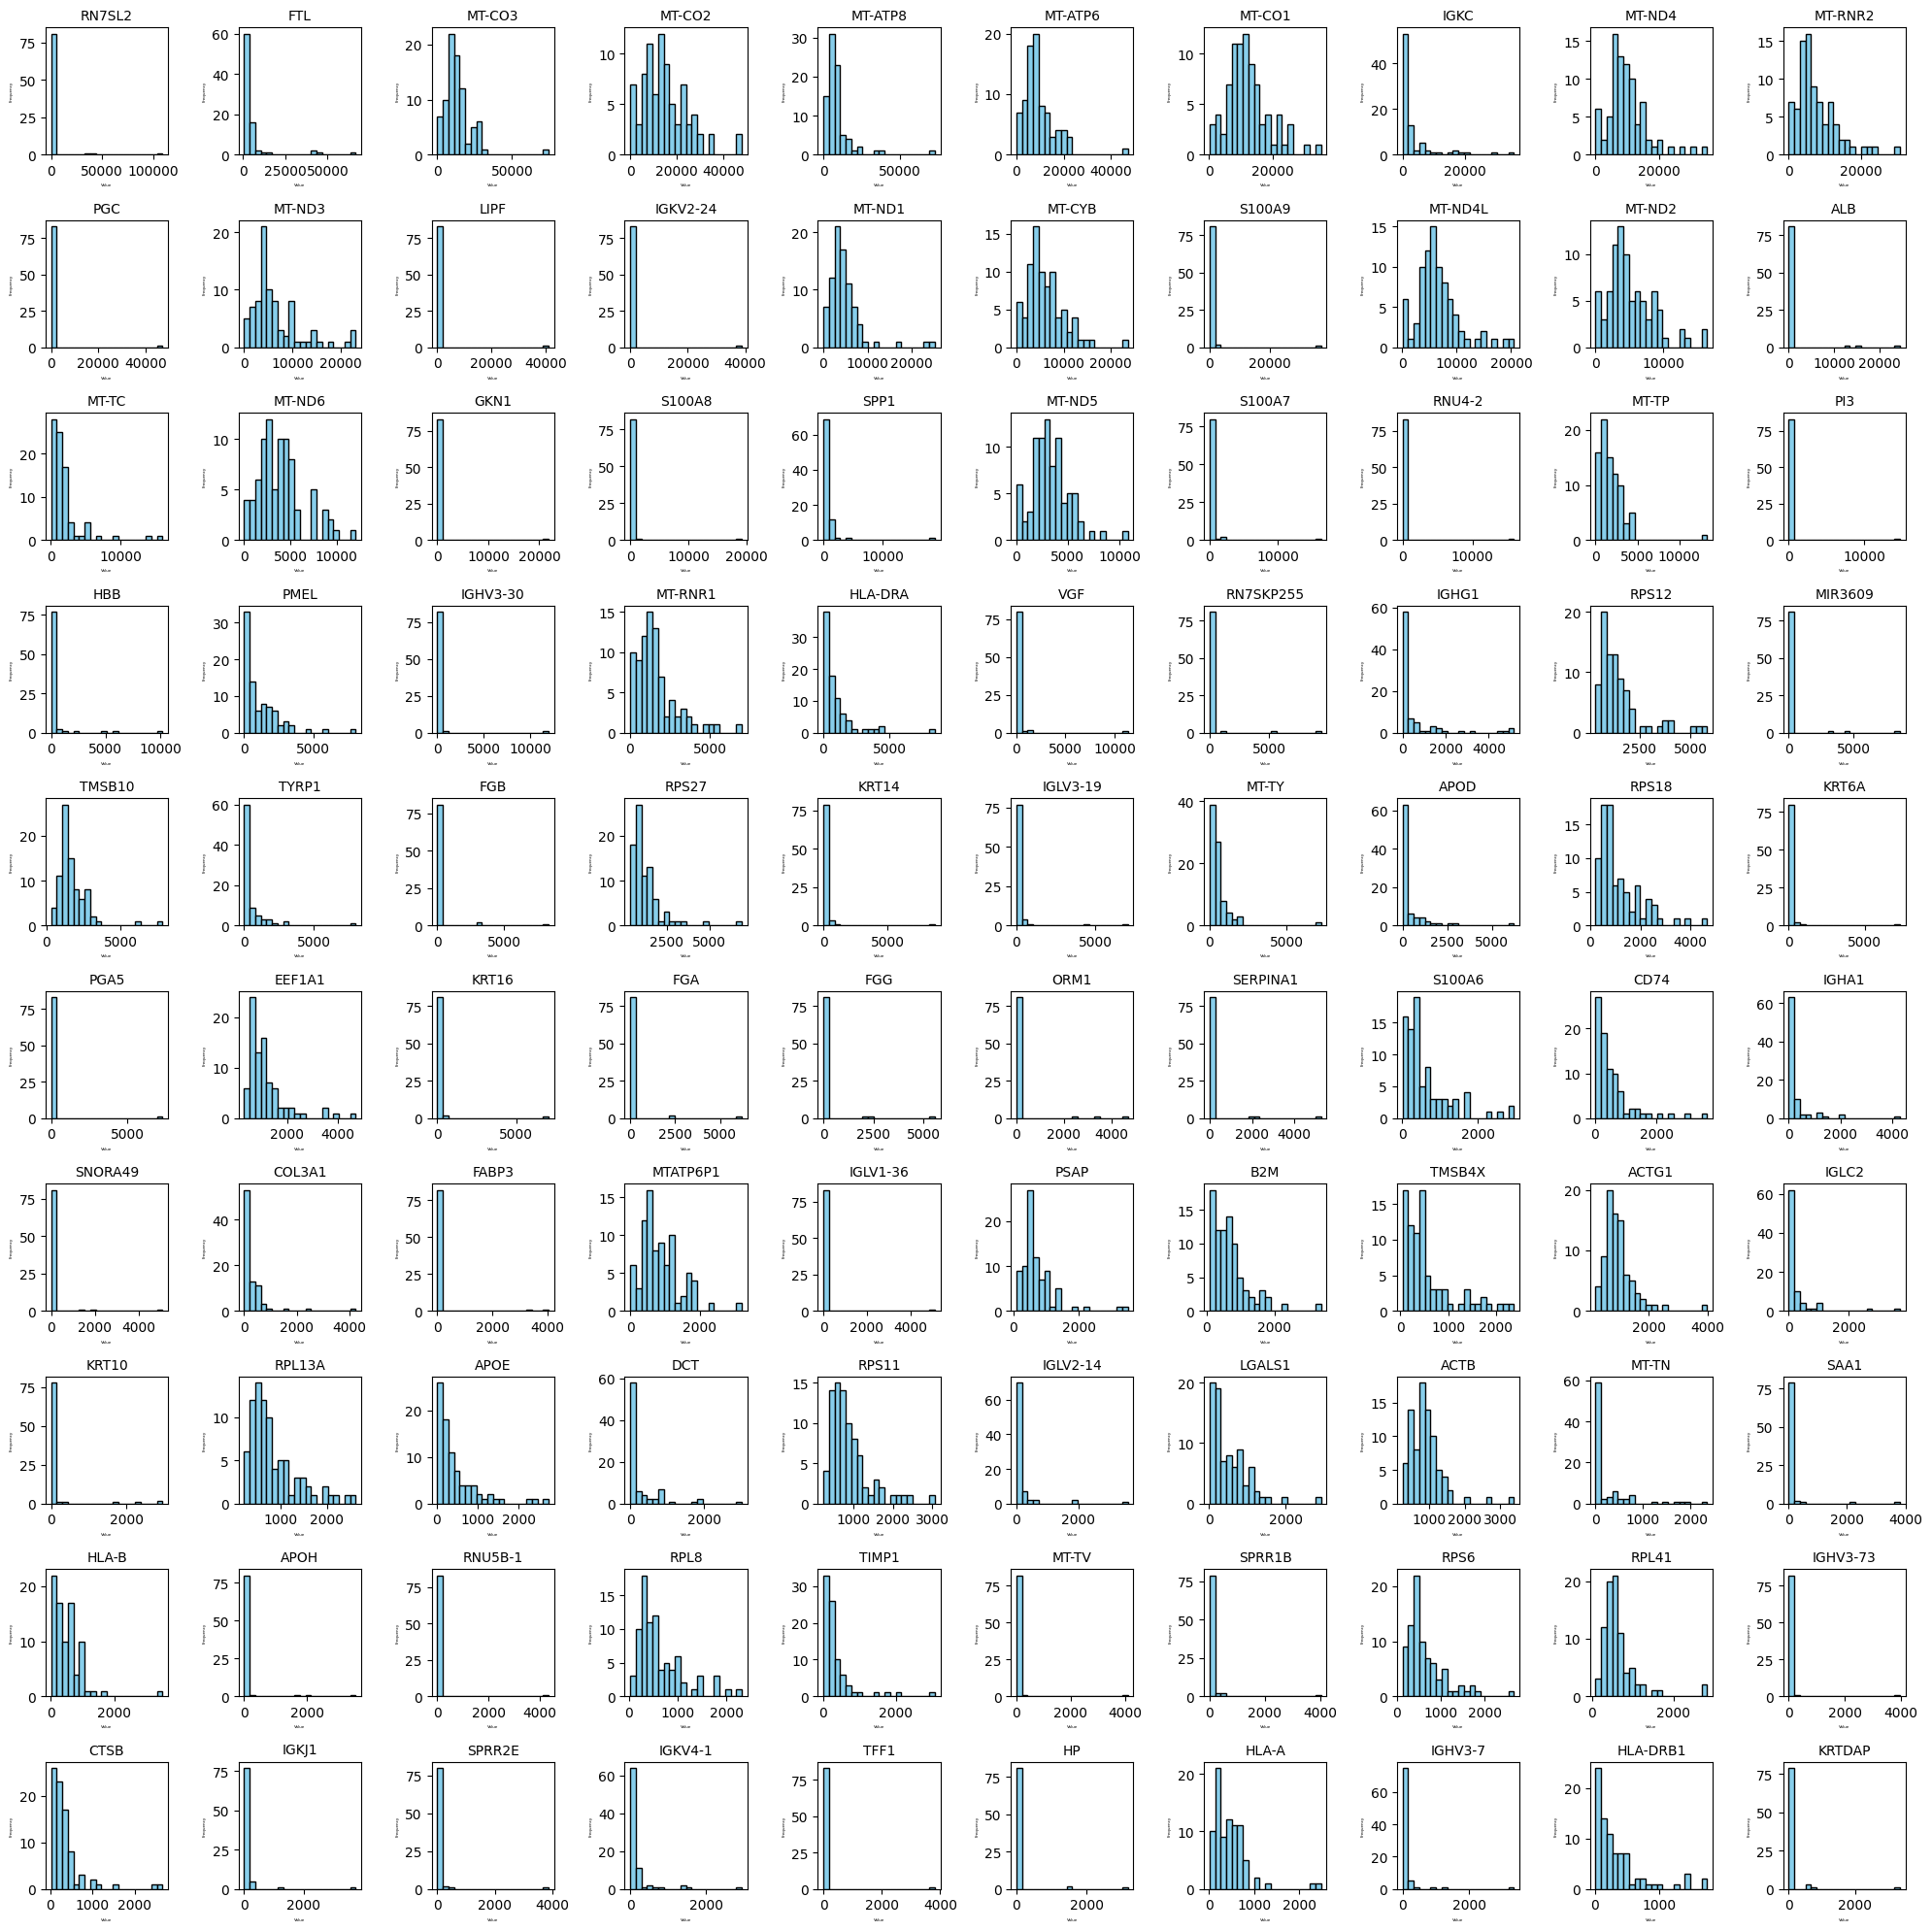

In [12]:
fig, axs = plt.subplots(10, 10, figsize=(20, 20))

axs = axs.flatten()


for i, gene in enumerate(top_100_var.index):

    gene_data = clean_data_numeric[gene]

    axs[i].hist(gene_data, bins=20, color='skyblue', edgecolor='black')

    axs[i].set_title(f'{gene}', fontsize=10)
    axs[i].set_xlabel('Value', fontsize=3)
    axs[i].set_ylabel('Frequency', fontsize=3)


plt.tight_layout()

plt.show()

In [13]:
top_100_var_data = clean_data_numeric[top_100_var.index]
print(top_100_var_data)

patient            RN7SL2           FTL        MT-CO3        MT-CO2  \
SRR7344546   33644.454092   1231.617313     67.426776     64.339660   
SRR7344554   40729.807664    787.335580    928.541945    853.233095   
SRR7344556  109408.937655    857.066598   1071.769147   1693.762112   
SRR7344564      70.048934   3472.052260   2214.160034   1878.942823   
SRR7344565     105.676179   3693.938050   1560.394044   1213.931068   
...                   ...           ...           ...           ...   
SRR5088920      16.198037   1814.055509  11013.345486   9488.733302   
SRR5088922       7.561333   1529.834995   9810.250395  12216.453037   
SRR5088924       5.673804   3084.589815   5596.764680   6814.939451   
SRR5088926       7.899099   3317.386985  16743.654778  20187.018760   
SRR5088929       8.693633  42142.557683  15177.616694  16782.852187   

patient         MT-ATP8      MT-ATP6        MT-CO1         IGKC        MT-ND4  \
SRR7344546    30.916026    27.419759    191.705397    49.113070   

In [14]:
# log2 transformation

# add 1 to all values for log2 transformation
clean_data = clean_data.applymap(lambda x: x+1 if isinstance(x, (int, float)) else x)

# to_transform = clean_data[~clean_data.index.str.contains("GSM24457")]

# log2 transform
to_transform = clean_data
log2_data = to_transform.applymap(lambda x: np.log2(x) if isinstance(x, (int, float)) else x)
log2_data.head()

patient,5S_rRNA,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,snoU2-30,snoU2_19,snoU83B,snoZ196,snoZ278,snoZ40,snoZ6,snosnR66,uc_338,yR211F11.2
SRR7344546,0.000000,0.177984,0.646144,0.051743,7.388509,1.137378,0.051041,0.129775,0.000000,0.647058,...,3.13092825610652,3.28747466891185,0.0,0.0,0.0,0.0,0.0,0.0,0.416319623212903,0.0
SRR7344554,0.128807,0.070845,0.784005,0.015067,7.796801,2.642253,0.221139,0.119809,0.135597,0.141127,...,13.6818810287859,1.57521656581416,0.0,0.0,0.0,0.0,0.0,0.0,0.364929374639851,0.0
SRR7344556,0.162194,0.000000,0.000000,0.012671,4.623303,1.391299,0.016639,0.306234,0.114778,0.157222,...,4.23564377253204,0.264727735783252,0.0,0.0,0.0,0.0,0.0,0.0,0.487394747280299,0.0
SRR7344564,0.267733,0.326047,2.220248,0.105718,7.145439,0.736532,0.055363,0.562818,0.044087,2.570499,...,0.226744499164846,0.0,0.360729885034982,2.85341392207446,0.0,0.0,0.0,0.0,0.0747493692947006,0.0
SRR7344565,0.135665,0.241141,1.811070,0.097685,6.680064,0.427896,0.927511,0.202232,0.076971,1.561955,...,0.0,0.437981509864241,0.0,1.57476497928716,0.0,0.0,0.0,0.0,0.0583043344721167,0.0


In [15]:
# encode categorical labels to numerical codes
labels = labels.values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
print("Label Map:")
for encoded_value, original_label in enumerate(label_encoder.classes_):
    print(f"{encoded_value}: {original_label}")

# count labels
label_counts = {}

for label in labels:
    label_counts[label] = label_counts.get(label, 0) + 1

for label, count in label_counts.items():
    print(f"Label '{label}': {count}")

Label Map:
0: N
1: R
Label 'R': 26
Label 'N': 58


In [16]:
# fix class imbalance

# use SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(log2_data, labels_encoded)

# count labels after resampling
resampled_counts = {}

for label in y_resampled:
    label_counts[label] = label_counts.get(label, 0) + 1

for label, count in label_counts.items():
    print(f"Label '{label}': {count}")

print(X_resampled)

Label 'R': 26
Label 'N': 58
Label '1': 58
Label '0': 58
patient   5S_rRNA      A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1     A2ML1  \
0        0.000000  0.177984  0.646144  0.051743  7.388509  1.137378  0.051041   
1        0.128807  0.070845  0.784005  0.015067  7.796801  2.642253  0.221139   
2        0.162194  0.000000  0.000000  0.012671  4.623303  1.391299  0.016639   
3        0.267733  0.326047  2.220248  0.105718  7.145439  0.736532  0.055363   
4        0.135665  0.241141  1.811070  0.097685  6.680064  0.427896  0.927511   
..            ...       ...       ...       ...       ...       ...       ...   
111      0.051181  0.079182  0.842032  0.000000  8.243470  0.852896  0.077917   
112      0.079283  0.040331  0.379863  0.134001  6.486408  0.408563  3.932220   
113      0.081206  0.097682  0.995735  0.000628  8.173263  0.326396  0.059735   
114      0.057028  0.124989  0.724959  0.001498  5.046443  1.043263  0.000395   
115      0.079552  0.123107  0.771791  0.002568  5.77

In [17]:
print(y_resampled)

[1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]


In [18]:
y_resampled = pd.Series(y_resampled, name='Response')

In [19]:
# z-score transformation (for PCA)
scaler = StandardScaler()
scaled_values = scaler.fit_transform(X_resampled)
scaled_data = pd.DataFrame(X_resampled)
print(scaled_data.head)

<bound method NDFrame.head of patient   5S_rRNA      A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1     A2ML1  \
0        0.000000  0.177984  0.646144  0.051743  7.388509  1.137378  0.051041   
1        0.128807  0.070845  0.784005  0.015067  7.796801  2.642253  0.221139   
2        0.162194  0.000000  0.000000  0.012671  4.623303  1.391299  0.016639   
3        0.267733  0.326047  2.220248  0.105718  7.145439  0.736532  0.055363   
4        0.135665  0.241141  1.811070  0.097685  6.680064  0.427896  0.927511   
..            ...       ...       ...       ...       ...       ...       ...   
111      0.051181  0.079182  0.842032  0.000000  8.243470  0.852896  0.077917   
112      0.079283  0.040331  0.379863  0.134001  6.486408  0.408563  3.932220   
113      0.081206  0.097682  0.995735  0.000628  8.173263  0.326396  0.059735   
114      0.057028  0.124989  0.724959  0.001498  5.046443  1.043263  0.000395   
115      0.079552  0.123107  0.771791  0.002568  5.779927  0.971756  0.008394  

In [20]:
# export

# clean data (no SMOTE)
clean_data_numeric.to_csv('GSE910_noSMOTE_clean_top100.csv')

# log2 transformed data (SMOTE)
log2_data.to_csv('/GSE910_SMOTE_log2_top100.csv')

# normalized version of above^ (SMOTE;for PCA)
scaled_data.to_csv('/GSE910_SMOTE_scaled_top100.csv')

# true labels (SMOTE; response y/n)
y_resampled.to_csv('/GSE910_SMOTE_labels_top100.csv')

